In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['Serial No.'],axis =1,inplace=True)

In [8]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
## min-max scaling will be used, bcoz we know the maximum marks of all the scores and papers.

In [10]:
X = df.iloc[:,0:-1]

In [11]:
y= df.iloc[:,-1]

In [12]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
258,326,102,4,5.0,5.0,8.76,1
177,319,110,3,3.5,3.5,9.04,0
119,327,104,5,3.0,3.5,8.84,1
194,316,109,3,3.5,3.0,8.76,0
229,324,111,4,3.0,3.0,9.01,1
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [17]:
y_train

258    0.77
177    0.82
119    0.71
194    0.77
229    0.82
       ... 
71     0.96
106    0.87
270    0.72
348    0.57
102    0.62
Name: Chance of Admit , Length: 268, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)

In [21]:
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled

array([[0.72      , 0.35714286, 0.75      , ..., 1.        , 0.62820513,
        1.        ],
       [0.58      , 0.64285714, 0.5       , ..., 0.57142857, 0.71794872,
        0.        ],
       [0.74      , 0.42857143, 1.        , ..., 0.57142857, 0.65384615,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.42857143, 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [23]:
X_test_scaled

array([[ 0.22      ,  0.42857143,  0.5       ,  0.625     ,  0.71428571,
         0.42307692,  1.        ],
       [ 0.42      ,  0.35714286,  0.5       ,  0.875     ,  0.71428571,
         0.58974359,  1.        ],
       [ 1.        ,  0.78571429,  1.        ,  0.75      ,  0.71428571,
         0.8974359 ,  1.        ],
       [ 0.7       ,  0.57142857,  0.75      ,  0.875     ,  0.71428571,
         0.72435897,  1.        ],
       [ 0.22      ,  0.17857143,  0.25      ,  0.5       ,  0.42857143,
         0.34615385,  1.        ],
       [ 1.        ,  0.82142857,  1.        ,  0.875     ,  0.85714286,
         0.84935897,  1.        ],
       [ 0.14      ,  0.14285714,  0.25      ,  0.375     ,  0.        ,
         0.34935897,  0.        ],
       [ 0.26      ,  0.25      ,  0.5       ,  0.25      ,  0.28571429,
         0.27564103,  0.        ],
       [ 0.44      ,  0.46428571,  0.25      ,  0.25      ,  0.28571429,
         0.52884615,  0.        ],
       [ 0.66      ,  0.75  

In [24]:
import tensorflow

In [25]:
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense

In [26]:
model = Sequential()

In [57]:
model.add(Dense(10,activation='relu',input_dim=7))
model.add(Dense(10,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

C:\Users\ayush\anaconda3\envs\tensor_flow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            14 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            14 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 884 (3.46 KB)

 Trainable params: 388 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 496 (1.94 KB)

In [71]:
model.compile(loss = 'mean_squared_error',optimizer='Adam',metrics=['r2_score'])

In [72]:
hist = model.fit(X_train_scaled,y_train,epochs = 500, validation_split=0.2)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0050 - r2_score: 0.7436 - val_loss: 0.0020 - val_r2_score: 0.9020
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - r2_score: 0.7905 - val_loss: 0.0018 - val_r2_score: 0.9116
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - r2_score: 0.7636 - val_loss: 0.0023 - val_r2_score: 0.8873
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - r2_score: 0.7882 - val_loss: 0.0018 - val_r2_score: 0.9105
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - r2_score: 0.7812 - val_loss: 0.0020 - val_r2_score: 0.9012
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - r2_score: 0.7701 - val_loss: 0.0021 - val_r2_score: 0.8985
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - r2_score: 0.7239 - val_loss: 0.0018 - val_r2_score: 0.9134
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - r2_score: 0.7356 - val_loss: 0.0019 - val_r2_score: 0.9065

In [73]:
predict = model.predict(X_test_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [74]:
predict

array([[0.63638604],
       [0.7442539 ],
       [0.9357144 ],
       [0.83555454],
       [0.5644451 ],
       [0.93473774],
       [0.52621603],
       [0.53896105],
       [0.675148  ],
       [0.84867996],
       [0.7184283 ],
       [0.91478056],
       [0.5534944 ],
       [0.8974315 ],
       [0.7207617 ],
       [0.6827766 ],
       [0.67084664],
       [0.48805976],
       [0.69519794],
       [0.9720273 ],
       [0.58022964],
       [0.65567166],
       [0.72842   ],
       [0.5365056 ],
       [0.94935507],
       [0.81240094],
       [0.6961354 ],
       [0.575232  ],
       [0.67417616],
       [0.8176514 ],
       [0.8152165 ],
       [0.94781464],
       [0.66526586],
       [0.50280577],
       [0.68409663],
       [0.6622415 ],
       [0.7091817 ],
       [0.6653495 ],
       [0.6368644 ],
       [0.8737374 ],
       [0.74103624],
       [0.62256265],
       [0.7719378 ],
       [0.9622806 ],
       [0.85801804],
       [0.8478326 ],
       [0.94229376],
       [0.661

In [75]:
from sklearn.metrics import accuracy_score, r2_score

In [76]:
r2_score(y_test,predict)

0.8034315870055587

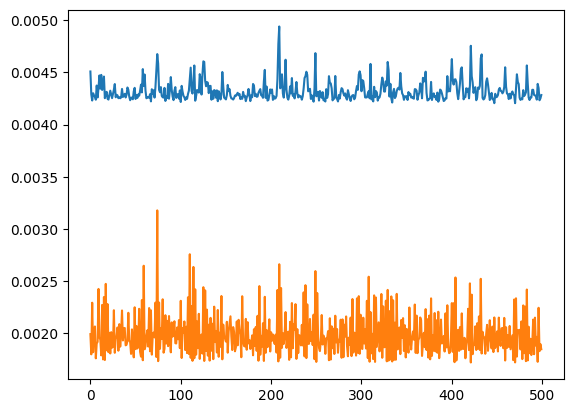

In [77]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

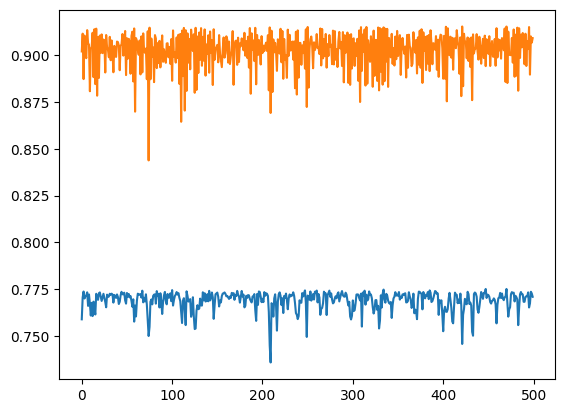

In [79]:
plt.plot(hist.history['r2_score'])
plt.plot(hist.history['val_r2_score'])